# Panel 3

### `import packages.needed`

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
#
from lrgsglib.core import *
#fig.savefig(path_l2dgs2_new / Path(f'l2d_gs2_xerr_new_{pflip}.pdf'), bbox_inches='tight', transparent=True)
move_to_rootf(print_tf=True)
plt.style.use('ipynb/nb_plotsheet.mplstyle')
#
path_paper = PATHPLOT / Path(PATHNPAPR)
path_panel3 = path_paper / Path('panel_3')
# path_eris_xerr = path_panel3 / Path('er_ising_xerr')
path_phase_diagram = path_panel3 / Path('phase_diagram')
path_l2dgs2 = path_panel3 / Path('l2d_gs2_xerr')
path_l2dgs2_new = path_panel3 / Path('l2d_gs2_xerr_new')

path_l2dgs0 = path_panel3 / Path('l2d_gs0_xerr')
path_l2dgs0r = path_panel3 / Path('l2d_gs0_r')
path_l2dss = path_panel3 / Path('l2d_ss')

Current working directory: /home/opisthofulax/Documents/PhD/projects/complex-networks/lrgsglib


### Fig. (a): Phase Diagram 
Expressions for the Nishimori line as function of $T$ and $p$

$$\mathrm{nishi}_p(T)=\frac12​(1+e^{k_B ​TJ}​)-1,\qquad
\mathrm{nishi}_T(p) = \frac{J}{k_B \ln\left(\frac{1}{2p} - 1\right)}$$

In [9]:
phd = 'serr' or 'xerr'
J, k_B, p_c = 1, 1, 0.103
nishi_p = lambda T: 0.5 * (1 + np.exp(J / (k_B * T)))**(-1)
nishi_T = lambda p: J * (k_B*np.log(1/(2*p)-1))**(-1)
#
T_c, T_max, p_max = 2.2, 2.5, 0.5
TlinSpace = np.linspace(1e-2, T_max, 100)
#
kwNishiLine = dict(ls='-.', lw=1, marker='', c='k', clip_on=True)
kwCritPoints = dict(marker='o', c='r', clip_on=False, zorder=1e3)
kwSgLine = dict(lw=2, ls='-', c='#8030ff', marker='', clip_on=False, zorder=9e1)

In [10]:
fig, ax = plt.subplots(figsize=(8, 5))
#
ax.set_ylim(0, T_max)
ax.set_xlim(0, p_max)
#
match phd:
    case 'xerr':
        xticks = [0, p_c, 0.4, 0.5]
        xticklabels = [r"0", r"\(p_{\mathrm{c}}^{(1)}\)", r"\(p_{\mathrm{c}}^{(2)}\)", r"0.5"]
        p_c1 = 0.4
    case 'serr':
        p_c1 = p_c
        xticks = [0, p_c, 0.5]
        xticklabels = [r"0", r"\(p_{\mathrm{c}}\)", r"0.5"]
        ax.text(p_max/3, T_max/2, r'\emph{Nishimori Line}', fontsize=16)
        ax.plot(nishi_p(TlinSpace), TlinSpace, **kwNishiLine)
#
critPoints = np.array([[0, p_c1], [T_c, 0]])
pSglinSpace = np.linspace(p_c1, p_max)
TSglinSpace = 0*np.ones(len(pSglinSpace))
yticks = [0, T_c]
yticklabels = [r"0", r"\(T_{\mathrm{c}}^{\text{\Large Ising}}\)"]
#
ax.text(p_c1-.05*p_c1, 0.1, r'\emph{Spin Glass}', c='#8030ff', fontsize=20)
ax.set_xticks(xticks)
ax.set_yticks(yticks)
ax.set_xticklabels(xticklabels)
ax.set_yticklabels(yticklabels)
#
ax.scatter(*critPoints, **kwCritPoints)
ax.plot(pSglinSpace, TSglinSpace, **kwSgLine)
#
ax.tick_params(axis='both', which='both', labelsize=30)
#
#
fig.savefig(os.path.join(path_phase_diagram, f'phase_diagram_{phd}.pdf'), 
            bbox_inches='tight', transparent=True)
plt.close('all')

### ttt

In [1]:
side_l = [32, 64, 96]

In [3]:
side = 32
neigen = 2
pflip=0.35
cell = 'randXERR'
tt = 'C480GS2'

Text(0.5, 0, '$T$')

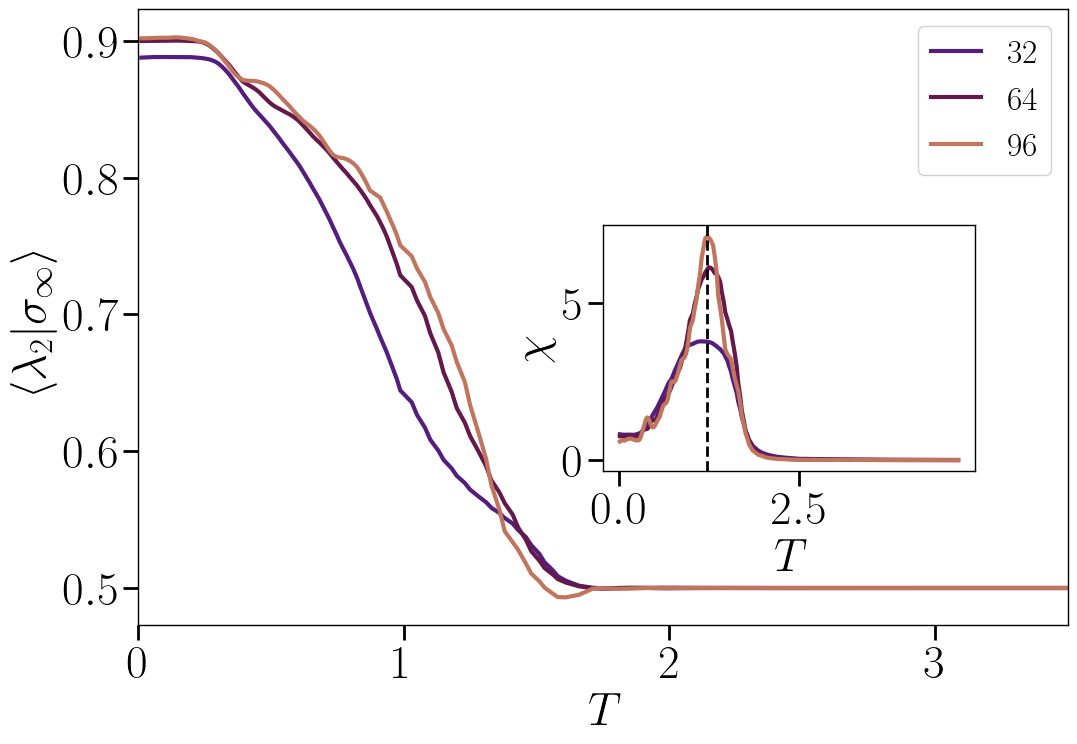

In [4]:
fig, ax = plt.subplots(figsize=(12, 8))  # Create a single figure with axes
inset_ax = ax.inset_axes([0.5, 0.25, 0.4, 0.4])
# ax.axvline(x=2.269, ls='--', color='k', lw=2)
# inset_ax.axvline(x=2.269, ls='--', color='k', lw=2)
for i,side in enumerate(side_l):
    col = restr_twilight((i+1)/len(side_l))
    lattice = Lattice2D(side, path_data=path_l2dgs2_new)
    fnames = os.listdir(lattice.isingpath)
    p_values = extract_values_from_filenames(fnames, r"p=([\d.]+)", unique=True)
    p_T_dict = {p: extract_values_from_filenames(fnames, rf"p={p}_T=([\d.]+)") 
                for p in p_values}
    averages = {}
    for p in p_values:
        averages[p] = []
        for T in p_T_dict[p]:
            filename = f"outcl0_p={p}_T={T}_{tt}.txt"
            filepath = os.path.join(lattice.isingpath, filename)
            if os.path.exists(filepath):
                try:
                    data = np.loadtxt(filepath)
                    data = data[np.all(np.abs(data) <= 1, axis=1)]
                    avg_abs_col1 = np.mean(np.abs(data[:, 0]))
                    chi_abs_col1 = np.std(np.abs(data[:, 0]))
                    avg_abs_col2 = np.mean(np.abs(data[:, 2]))
                    chi_abs_col2 = np.std(np.abs(data[:, 2]))
                    averages[p].append((float(T), avg_abs_col1, chi_abs_col1, avg_abs_col2, chi_abs_col2))
                except:
                    pass
    averages = {p: np.array(aa) for p, aa in averages.items()}

    # linax, = ax.plot(averages[pflip][:,0], gaussian_filter(averages[pflip][:,1], sigma=2), '-', lw=3, label=f'{side}')
    linax2, = ax.plot(averages[pflip][:,0], gaussian_filter(averages[pflip][:,3], sigma=2), '-', color=col, lw=3, label=f'{side}')

    # inset_ax.plot(averages[pflip][:,0], gaussian_filter(averages[pflip][:,2], sigma=2)*side, '-', lw=3, color=linax.get_color(), label=f'{side}')
    inset_ax.plot(averages[pflip][:,0], gaussian_filter(averages[pflip][:,4], sigma=2)*side, '-', lw=3, color=linax2.get_color(), label=f'{side}')
    if i == len(side_l)-1:
        xmaxp= np.argmax(gaussian_filter(averages[pflip][:,4], sigma=2))
        inset_ax.axvline(x=averages[pflip][xmaxp,0], ls='--', color='k', lw=2)
# Customize the plot
ax.set_xlabel(r'$T$')
ax.set_ylabel(r'$\left\langle{\lambda_2|\sigma_\infty}\right\rangle$')
# inset_ax.set_yscale('log')
ax.legend(fontsize=24)
inset_ax.set_ylabel(r'$\chi$')
ax.set_xbound(0, 3.5)
inset_ax.set_xlabel(r'$T$')

# fig.savefig(path_l2dgs2_new / Path(f'l2d_gs2_xerr_new_{pflip}.pdf'), bbox_inches='tight', transparent=True)

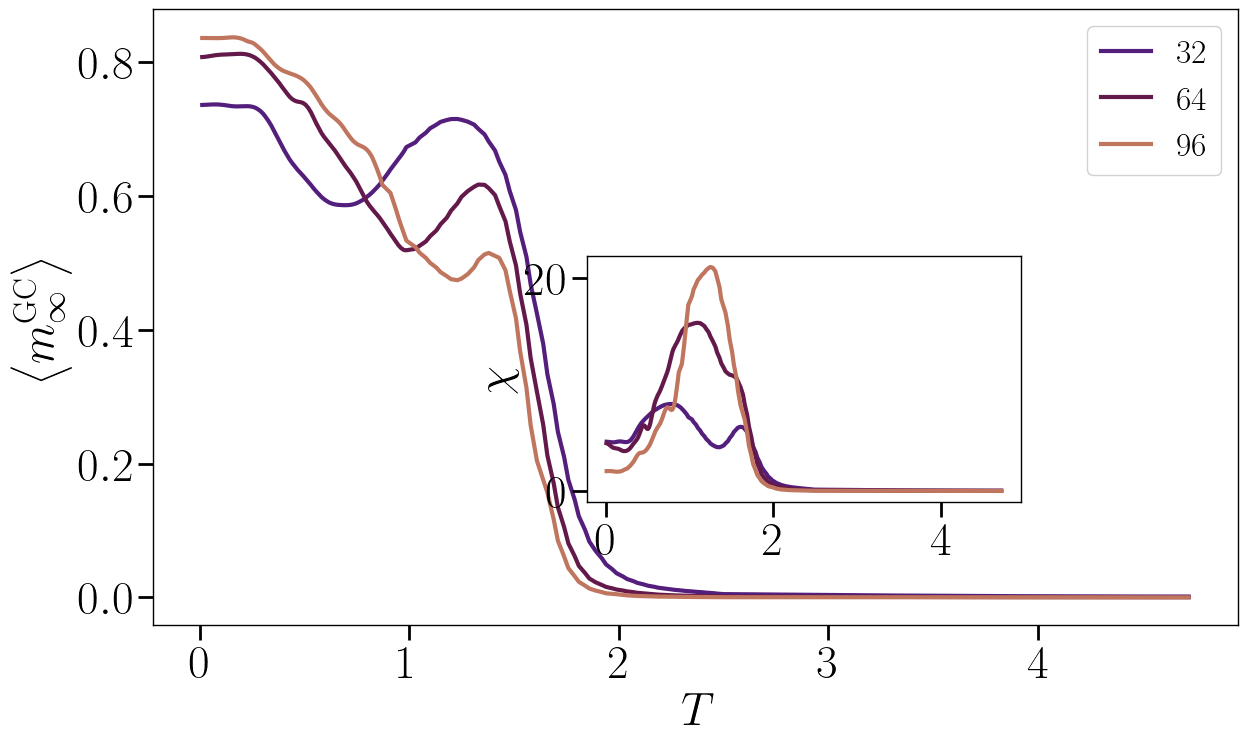

In [33]:
fig, ax = plt.subplots(figsize=(14, 8))  # Create a single figure with axes
inset_ax = ax.inset_axes([0.4, 0.2, 0.4, 0.4])
# ax.axvline(x=2.269, ls='--', color='k', lw=2)
# inset_ax.axvline(x=2.269, ls='--', color='k', lw=2)
for i,side in enumerate(side_l):
    col = restr_twilight((i+1)/len(side_l))
    lattice = Lattice2D(side, path_data=path_l2dgs2_new)
    fnames = os.listdir(lattice.isingpath)
    p_values = extract_values_from_filenames(fnames, r"p=([\d.]+)", unique=True)
    p_T_dict = {p: extract_values_from_filenames(fnames, rf"p={p}_T=([\d.]+)") 
                for p in p_values}
    averages = {}
    for p in p_values:
        averages[p] = []
        for T in p_T_dict[p]:
            filename = f"outcl0_p={p}_T={T}_{tt}.txt"
            filepath = os.path.join(lattice.isingpath, filename)
            if os.path.exists(filepath):
                try:
                    data = np.loadtxt(filepath)
                    data = data[np.all(np.abs(data) <= 1, axis=1)]
                    avg_abs_col1 = np.mean(np.abs(data[:, 0]))
                    chi_abs_col1 = np.std(np.abs(data[:, 0]))
                    avg_abs_col2 = np.mean(np.abs(data[:, 1]))
                    chi_abs_col2 = np.std(np.abs(data[:, 1]))
                    averages[p].append((float(T), avg_abs_col1, chi_abs_col1, avg_abs_col2, chi_abs_col2))
                except:
                    pass
    averages = {p: np.array(aa) for p, aa in averages.items()}

    linax, = ax.plot(averages[pflip][:,0], gaussian_filter(averages[pflip][:,1], sigma=3), '-', c=col, lw=3, label=f'{side}')
    # linax2, = ax.plot(averages[pflip][:,0], gaussian_filter(averages[pflip][:,1], sigma=2), '-', color=col, lw=3, label=f'{side}')

    inset_ax.plot(averages[pflip][:,0], gaussian_filter(averages[pflip][:,2], sigma=3)*side, '-', lw=3, color=linax.get_color(), label=f'{side}')
    # inset_ax.plot(averages[pflip][:,0], gaussian_filter(averages[pflip][:,2], sigma=2)*side, '-', lw=3, color=linax2.get_color(), label=f'{side}')
    # if i == len(side_l)-1:
    #     xmaxp= np.argmax(gaussian_filter(averages[pflip][:,4], sigma=2))
    #     inset_ax.axvline(x=averages[pflip][xmaxp,0], ls='--', color='k', lw=2)
# Customize the plot
ax.set_xlabel(r'$T$')
ax.set_ylabel(r'$\left\langle{m_{\infty}^{\mathrm{GC}}}\right\rangle$')
# inset_ax.set_yscale('log')
ax.legend(fontsize=24)
inset_ax.set_ylabel(r'$\chi$')

fig.savefig(path_l2dgs2_new / Path(f'mINF_l2d_gs2_xerr_new_{pflip}.pdf'), bbox_inches='tight', transparent=True)

In [27]:
# averages = {}
# for p in p_values:
#     averages[p] = []
#     for T in p_T_dict[p]:
#         filename = f"outcl0_p={p}_T={T}_{tt}.txt"
#         filepath = os.path.join(lattice.isingpath, filename)
#         if os.path.exists(filepath):
#             try:
#                 data = np.loadtxt(filepath)
#                 data = data[np.all(np.abs(data) <= 1, axis=1)]
#                 avg_abs_col1 = np.mean(np.abs(data[:, 0]))
#                 chi_abs_col1 = np.std(np.abs(data[:, 0]))
#                 avg_abs_col2 = np.mean(np.abs(data[:, 2]))
#                 chi_abs_col2 = np.std(np.abs(data[:, 2]))
#                 averages[p].append((float(T), avg_abs_col1, chi_abs_col1, avg_abs_col2, chi_abs_col2))
#             except:
#                 pass
# averages = {p: np.array(aa) for p, aa in averages.items()}

In [28]:
# fig, ax = plt.subplots(figsize=(10, 8))  # Create a single figure with axes
# inset_ax = ax.inset_axes([0.15, 0.1, 0.4, 0.4])
# ax.axvline(x=2.269, ls='--', color='k', lw=2)
# inset_ax.axvline(x=2.269, ls='--', color='k', lw=2)

# linax, = ax.plot(averages[pflip][:,0], gaussian_filter(averages[pflip][:,1], sigma=1), '-', lw=3, label=f'{side}')
# linax2, = ax.plot(averages[pflip][:,0], averages[pflip][:,3], '-', lw=3, label=f'{side}')

# inset_ax.plot(averages[pflip][:,0], gaussian_filter(averages[pflip][:,2], sigma=1)*side, '-', lw=3, color=linax.get_color(), label=f'{side}')
# inset_ax.plot(averages[pflip][:,0], gaussian_filter(averages[pflip][:,4], sigma=1)*side, '-', lw=3, color=linax2.get_color(), label=f'{side}')

# # Customize the plot
# ax.set_xlabel(r'$T$')
# ax.set_ylabel(r'$\left\langle{m_{\infty}^{\mathrm{GC}}}\right\rangle$')
# # inset_ax.set_yscale('log')
# ax.legend(fontsize=24)
# # inset_ax.set_ylabel(r'$\chi$')

### Fig. (e): Phase diagram numerical $\lambda_2$ 

In [21]:
side = 64
neigen = 2
cell = 'randXERR'
tt = 'long'

In [22]:
lattice = Lattice2D(side, path_data=path_l2dgs2)
fnames = os.listdir(lattice.isingpath)
p_values = extract_values_from_filenames(fnames, r"p=([\d.]+)", unique=True)
p_T_dict = {p: extract_values_from_filenames(fnames, rf"p={p}_T=([\d.]+)") 
            for p in p_values}

In [24]:
averages = []
for p in p_values:
    for T in p_T_dict[p]:
        filename = f"outcl0_p={p}_T={T}_gs{neigen}{cell}{tt}.txt"
        filepath = os.path.join(lattice.isingpath, filename)
        if os.path.exists(filepath):
            try:
                data = np.loadtxt(filepath)
                data = data[np.all(np.abs(data) <= 1, axis=1)]
                avg_abs_col1 = np.mean(np.abs(data[:, 0]))
                averages.append((float(p), float(T), avg_abs_col1))
            except:
                pass
averages = np.array(averages)

In [25]:
p_values_plot = averages[:, 0]
T_values_plot = averages[:, 1]
avg_abs_col1_plot = averages[:, 2]
x, y, z = interpolate_grid_data(p_values_plot, T_values_plot, avg_abs_col1_plot, 
                                method='nearest', num_points=100)
z_smoothed = gaussian_filter(z, sigma=5)  # Adjust sigma for more/less smoothing

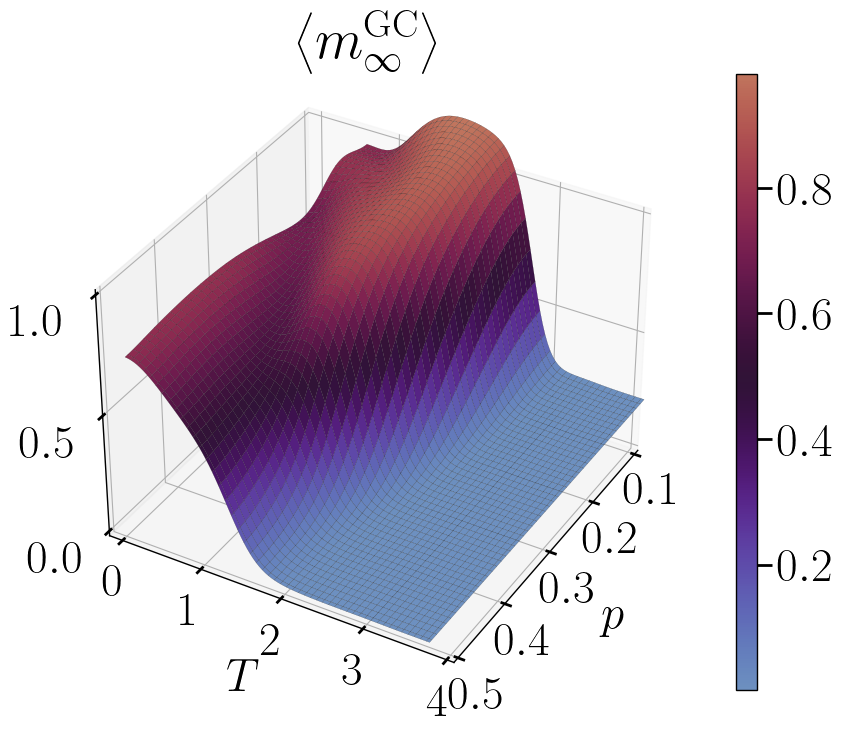

In [26]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
im = ax.plot_surface(x, y, z_smoothed, cmap=restr_twilight, rasterized=True,
                edgecolor='k', lw=0.1)

cax = fig.add_subplot(1,30,30)
   
fig.colorbar(im, cax=cax)

ax.set_xlabel(r'$p$', labelpad=20)
ax.set_ylabel(r'$T$', labelpad=20)
ax.set_title(r'$\left\langle{m_{\infty}^{\mathrm{GC}}}\right\rangle$')
ax.set_zticks([0, 0.5, 1])
ax.set_yticks(np.linspace(0, 4, num=5))
ax.view_init(elev=35, azim=30)
# ax.set_box_aspect([1,1,1])
ax.zaxis.set_tick_params(pad=15)
ax.set_zlim(0, 1)
# ax.text(1, 0, 1.4, r'\textbf{(d)}', fontsize=40, 
#                 fontweight='bold', color='black')
# plt.close('all')
ax.set_xlim(0.1, 0.5)
fig.savefig(path_l2dgs2 / Path(f'PhDiaL2D_3d_{side}_{cell}.pdf'), 
                bbox_inches='tight', transparent=True, dpi=200)

### Fig. (f): Phase diagram at $p=0$ numerical $\lambda_2$ 

In [5]:
sides = [32, 48, 64]
neigen = 2
cell = 'randXERR'
tt = 'long'

In [6]:
T_values_plot = {}
z_values_plot = {}
chi_values_plot = {}
for side in sides:
    # Initialize lattice and get filenames
    lattice = Lattice2D(side, path_data=path_l2dgs2)
    fnames = os.listdir(lattice.isingpath)
    
    # Extract p values
    p_values = extract_values_from_filenames(fnames, r"p=([\d.]+)", unique=True)
    
    # Find the smallest p value
    min_p =0.398
    print(p_values)
    
    # Get the corresponding T values for this p
    T_values = extract_values_from_filenames(fnames, rf"p={min_p}_T=([\d.]+)")
    
    averages = []
    variances = []
    # Iterate through T values and compute averages
    for T in T_values:
        filename = f"outcl0_p={min_p}_T={T}_gs{neigen}{cell}{tt}.txt"
        filepath = os.path.join(lattice.isingpath, filename)
        if os.path.exists(filepath):
            try:
                data = np.loadtxt(filepath)
                data = data[np.all(np.abs(data) <= 1, axis=1)]
                avg_abs_col1 = np.mean(np.abs(data[:, 0]))
                var_abs_col1 = np.std(np.abs(data[:, 0]))
                averages.append((float(T), avg_abs_col1))
                variances.append((float(T), var_abs_col1))
            except:
                pass

    averages = np.array(averages)
    variances = np.array(variances)
    
    # Extract T and z values
    T_values_plot[side] = averages[:, 0]
    z_values_plot[side] = averages[:, 1]
    chi_values_plot[side] = variances[:, 1]

    # Plot z vs T for this side valu

[0.0917 0.133  0.173  0.194  0.235  0.255  0.275  0.296  0.316  0.357
 0.5    0.337  0.398  0.459  0.0712 0.112  0.0304 0.418  0.153  0.214
 0.0508 0.48   0.01   0.378  0.439 ]
[0.0917 0.133  0.173  0.194  0.235  0.255  0.275  0.296  0.316  0.357
 0.5    0.337  0.398  0.459  0.0712 0.112  0.0304 0.418  0.153  0.214
 0.0508 0.48   0.01   0.378  0.439 ]
[0.0917 0.133  0.173  0.194  0.235  0.255  0.275  0.296  0.316  0.357
 0.5    0.337  0.398  0.459  0.0712 0.112  0.0304 0.418  0.153  0.214
 0.0508 0.48   0.01   0.378  0.439 ]


Text(0, 0.5, '$\\chi$')

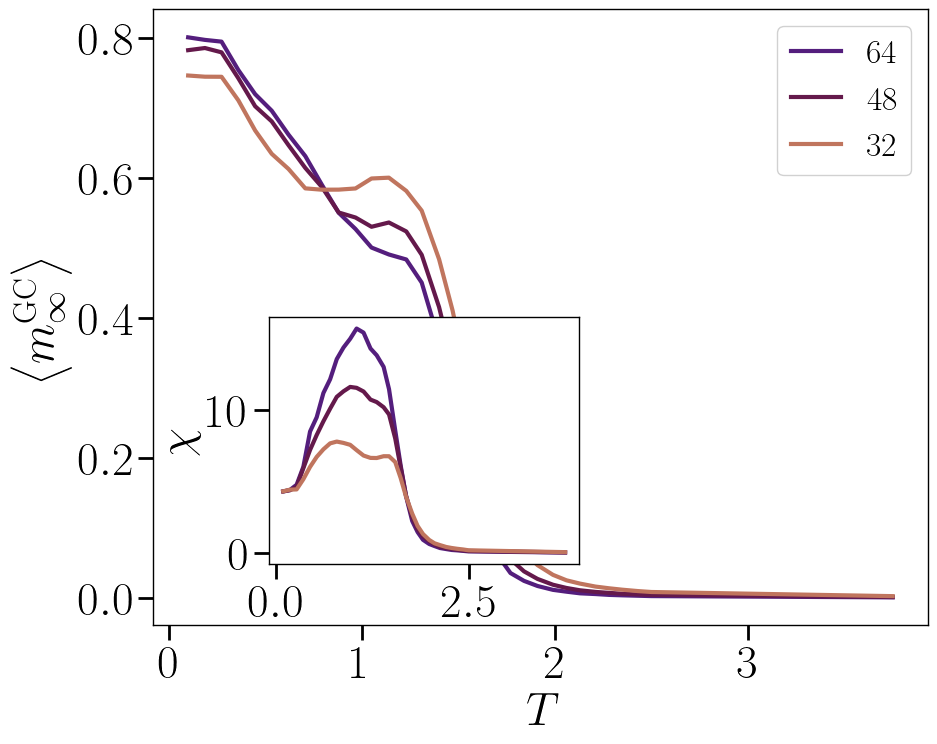

In [7]:
fig, ax = plt.subplots(figsize=(10, 8))  # Create a single figure with axes
inset_ax = ax.inset_axes([0.15, 0.1, 0.4, 0.4])
# ax.axvline(x=2.269, ls='--', color='k', lw=2)
# inset_ax.axvline(x=2.269, ls='--', color='k', lw=2)

for cont,side in enumerate(sides[::-1]):
    col = restr_twilight((cont+1)/len(sides))
    ax.plot(T_values_plot[side], z_values_plot[side], '-', lw=3, color=col, label=f'{side}')
    inset_ax.plot(T_values_plot[side], gaussian_filter(chi_values_plot[side], sigma=0.5)*side, '-', lw=3, color=col, label=f'{side}')

# Customize the plot
ax.set_xlabel(r'$T$')
ax.set_ylabel(r'$\left\langle{m_{\infty}^{\mathrm{GC}}}\right\rangle$')
ax.legend(fontsize=24)
inset_ax.set_ylabel(r'$\chi$')

# fig.savefig(path_l2dgs2 / Path(f'PhDiaL2D_2d_{cell}.pdf'), 
#             bbox_inches='tight', transparent=True)
# plt.close('all')

In [14]:
fig, ax = plt.subplots(figsize=(8, 8))
cnt = ax.contourf(x, y, z, levels=200, cmap=restr_twilight, antialiased=False)
div = make_axes_locatable(ax)
cax = div.append_axes('right', '5%', '5%')
cb = fig.colorbar(cnt, cax=cax)

ax.set_xlabel(r'$p$', labelpad=20)
ax.set_ylabel(r'$T$', labelpad=20)
cb.set_label(r'$\expval{m_{\infty, 2}^{\mathrm{GC}}}$', rotation=270, labelpad=50)

cnt.set_edgecolor("face")

fig.savefig(path_l2dgs2 / Path(f'PhDiaL2D_{side}_{cell}.pdf'), 
                bbox_inches='tight', transparent=True)
plt.close('all')

### Fig. (g): Phase Diagram numerical $\lambda_0$

In [39]:
sides = [32, 48, 64]
neigen = 0
tt = 'r'

In [40]:
T_values_plot = {}
z_values_plot = {}
chi_values_plot = {}
for side in sides:
    # Initialize lattice and get filenames
    lattice = Lattice2D(side, path_data=path_l2dgs0r)
    fnames = os.listdir(lattice.isingpath)
    
    # Extract p values
    p_values = extract_values_from_filenames(fnames, r"p=([\d.]+)", unique=True)
    
    # Find the smallest p value
    min_p = 0.233
    # Get the corresponding T values for this p
    T_values = extract_values_from_filenames(fnames, f"p={min_p}"+r"_T=([\d.]+)")
    
    averages = []
    variances = []
    # Iterate through T values and compute averages
    for T in T_values:
        filename = f"outcl0_p={min_p}_T={T}_gs{neigen}_{tt}.txt"
        filepath = os.path.join(lattice.isingpath, filename)
        if os.path.exists(filepath):
            try:
                data = np.loadtxt(filepath)
                data = data[np.all(np.abs(data) <= 1, axis=1)]
                avg_abs_col1 = np.mean(np.abs(data[:, 0]))
                var_abs_col1 = np.std(np.abs(data[:, 0]))
                averages.append((float(T), avg_abs_col1))
                variances.append((float(T), var_abs_col1))
            except:
                pass

    averages = np.array(averages)
    variances = np.array(variances)
    
    # Extract T and z values
    T_values_plot[side] = averages[:, 0]
    z_values_plot[side] = averages[:, 1]
    chi_values_plot[side] = variances[:, 1]


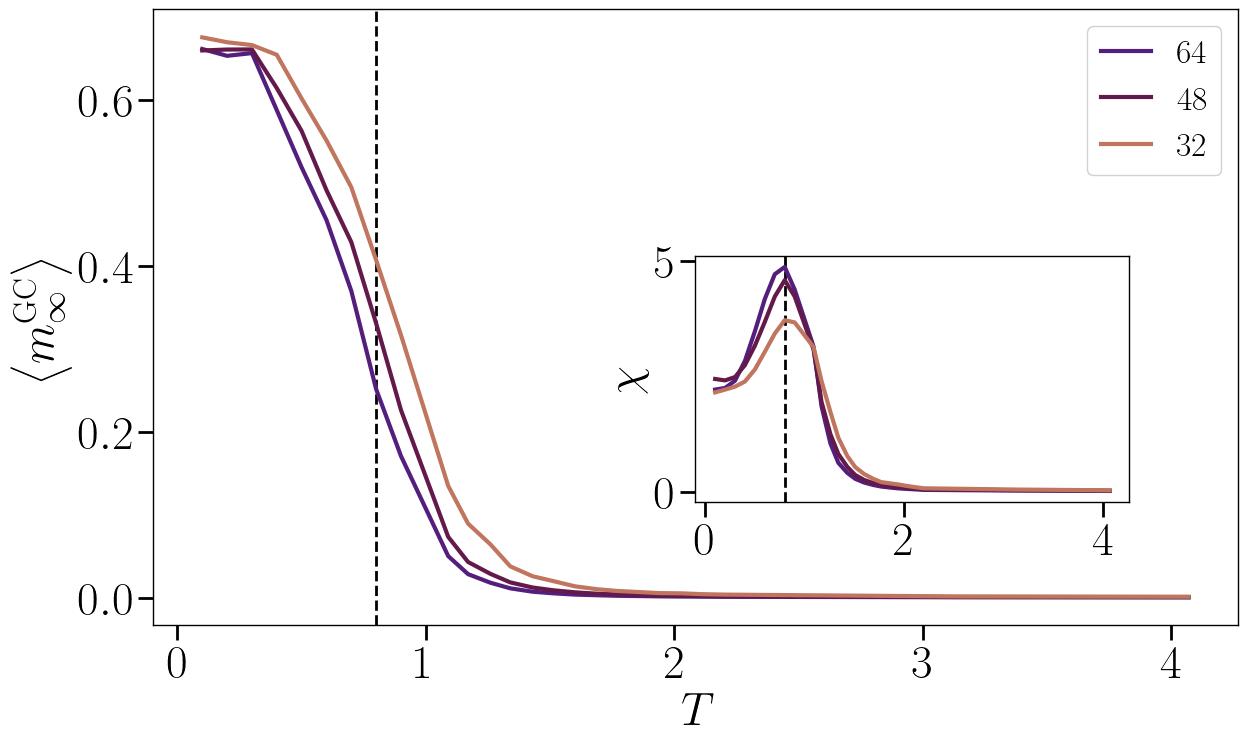

In [41]:
fig, ax = plt.subplots(figsize=(14, 8))  # Create a single figure with axes
inset_ax = ax.inset_axes([0.5, 0.2, 0.4, 0.4])

for cont,side in enumerate(sides[::-1]):
    if cont == 0:
        x = np.argmax(gaussian_filter(chi_values_plot[side], sigma=1))
        ax.axvline(x=T_values_plot[side][x], ls='--', color='k', lw=2)
        inset_ax.axvline(x=T_values_plot[side][x], ls='--', color='k', lw=2)
    col = restr_twilight((cont+1)/len(sides))
    ax.plot(T_values_plot[side], z_values_plot[side], '-', lw=3, color=col, label=f'{side}')
    inset_ax.plot(T_values_plot[side], gaussian_filter(chi_values_plot[side], sigma=1)*side, '-', lw=3, color=col, label=f'{side}')

# Customize the plot
ax.set_xlabel(r'$T$')
ax.set_ylabel(r'$\left\langle{m_{\infty}^{\mathrm{GC}}}\right\rangle$')
ax.legend(fontsize=24)
inset_ax.set_ylabel(r'$\chi$')

fig.savefig(path_l2dgs2 / Path(f'PhDiaL2D_2d_{tt}.pdf'), 
            bbox_inches='tight', transparent=True)
# plt.close('all')

### Fig. (f): magnGC single slice 

In [ ]:
sizes = [16, 32, 64]
sffx = 'gs0_r'

In [ ]:

fig, ax = plt.subplots(figsize=(10, 8))
inset_bounds = [0.65, 0.55, 0.3, 0.4]  # Position and size of the inset

# Create an inset plot using inset_axes
ax_inset = ax.inset_axes(inset_bounds)
colr = 1/len(sizes)
for i, side in enumerate(sizes):
    l = Lattice2D(side1=side, sgpath=clusterdatapath)
    P, T, mgcinf, vargcinf = get_meangc(l.isingpath, custromstr=sffx)
    P = sorted(list(P))
    P_sel = P[0]
    color = restr_twilight(P_sel/max(P))
    x = sorted(mgcinf[P_sel].keys())
    sorted_values = np.array([mgcinf[P_sel][key] for key in x])
    y = sorted_values
    sorted_values = np.array([vargcinf[P_sel][key] for key in x])
    y2 = sorted_values
    # y1 = gaussian_filter(y, sigma=3)
    # y2 = y1[::-1]
    # y = y2#np.concatenate([y1[:len(y1)//2], y2[:len(y1)//2:-1]])
    ax.plot(x, y, marker='o', ls='-', lw=3, color=restr_twilight((i+1)*colr), label=f'$L={side}$')
    ax_inset.plot(x, y2*l.N, marker='o', ls='-', color=restr_twilight((i+1)*colr))
# ax_inset.set_yticks([])
ax_inset.set_xticks([0, 2.2, 4])
ax_inset.set_ylabel(r'$\chi$')
ax.set_ylabel(r'$\avg*{m_{\infty}^{\mathrm{GC}}}$')
for axx in [ax, ax_inset]:
    axx.set_xlabel(r'$T$')
ax_inset.axvline(x=2.2, color='k', ls='--')
ax_inset.tick_params(axis='both', which='major', labelsize=28)
ax.legend(loc='lower left', fontsize=28)
fig.savefig(os.path.join(plotpath, f'magnGC_{sffx}_{P_sel}.pdf'), bbox_inches='tight', transparent=True)